In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

There is some sampling error in the full set since I didn't wait for elemental's mana pool size to update ... Sample 2 is the most reliable here.

In [12]:
sample_2 = pd.read_csv("../data/manual/mana/sample_2.csv")

In [15]:
sample_2

,mage,elem
0,8186,2988
1,7781,2988
2,7556,2949
3,7451,2914
4,7211,2894
5,6866,2860
6,6761,2850
7,6476,2820
8,6086,2781
9,5666,2741


<AxesSubplot:xlabel='mage', ylabel='elem'>

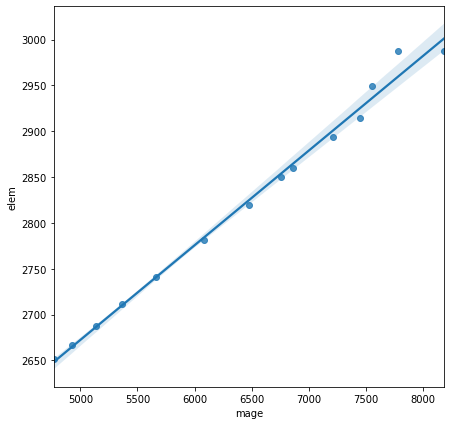

In [17]:
plt.figure(figsize=(7,7))
sns.regplot(data=sample_2, x='mage', y='elem')

In [21]:
x, y = sample_2.mage, sample_2.elem
stats.linregress(x, y)

LinregressResult(slope=0.10325895875591616, intercept=2155.964180430793, rvalue=0.9960156598670213, pvalue=5.726899709713097e-14, stderr=0.0026688927798748253, intercept_stderr=17.44798695420739)

<AxesSubplot:xlabel='mage', ylabel='elem'>

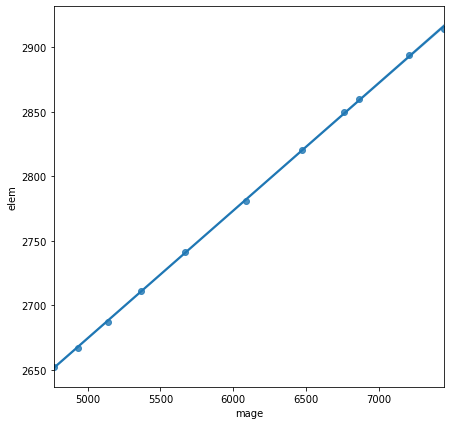

In [18]:
sample_2_under = sample_2[sample_2.mage < 7500]
plt.figure(figsize=(7,7))
sns.regplot(data=sample_2_under, x='mage', y='elem')

Likely exactly linear scaling with some roundoff errors.

In [19]:
from scipy import stats

In [20]:
x, y = sample_2_under.mage, sample_2_under.elem
stats.linregress(x, y)

LinregressResult(slope=0.09881242816189868, intercept=2180.3759982372685, rvalue=0.9999091211221519, pvalue=3.805759221013903e-18, stderr=0.0004440852977258294, intercept_stderr=2.7234214283272773)

Let's look at all w/o dups.

In [31]:
no_dups = pd.read_csv("../data/manual/mana/no_dups.csv")

<AxesSubplot:xlabel='mage', ylabel='elem'>

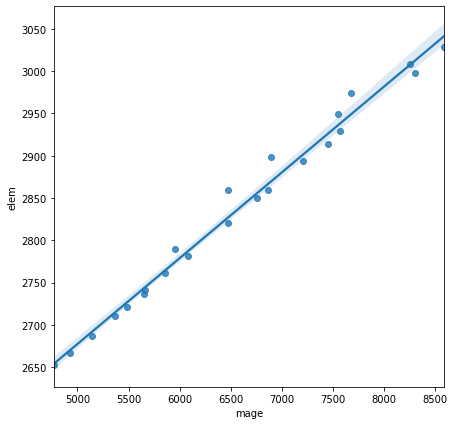

In [32]:
plt.figure(figsize=(7,7))
sns.regplot(data=no_dups, x='mage', y='elem')

In [43]:
x, y = no_dups.mage, no_dups.elem
res = stats.linregress(x, y)

In [44]:
res

LinregressResult(slope=0.10135404516622894, intercept=2170.6623964245186, rvalue=0.9930861653934877, pvalue=5.0174716227009106e-21, stderr=0.002614369918358633, intercept_stderr=17.404767683331094)

Let's try filtering elements with ratio ~< 0.10.

In [34]:
all_ = pd.read_csv("../data/manual/mana/no_dups.csv")

In [48]:
fit_cand = all_[((all_.elem - res.intercept) / all_.mage) < res.slope]

<AxesSubplot:xlabel='mage', ylabel='elem'>

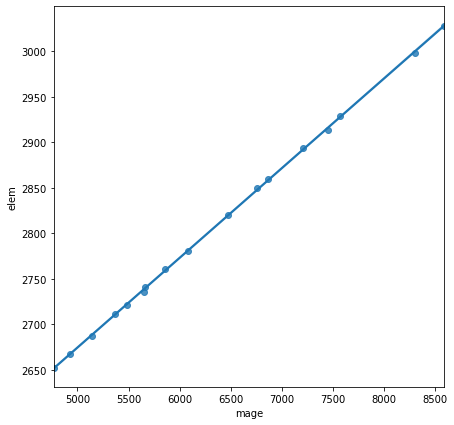

In [49]:
plt.figure(figsize=(7,7))
sns.regplot(data=fit_cand, x='mage', y='elem')

In [53]:
x, y = fit_cand.mage, fit_cand.elem
F = stats.linregress(x, y)
F

LinregressResult(slope=0.098547465320887, intercept=2181.673257019365, rvalue=0.9999159391593138, pvalue=9.97090934887794e-30, stderr=0.00032994311712963875, intercept_stderr=2.1325783423687277)

In [51]:
fit_cand

,mage,elem
0,8591,3028
3,7571,2929
7,5861,2761
8,5651,2736
9,5486,2721
10,8306,2998
12,7451,2914
13,7211,2894
14,6866,2860
15,6761,2850


Includes mainly 2nd sample samples and also Frohzone's sample.

Going to make a predict from Zander's current mana.

In [55]:
x = 7736

In [56]:
F.slope * x + F.intercept

2944.0364487417464

Yep! It's 2944.